# 太陽能資訊

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
base_path = './02_data/'

In [6]:
import json
ffn = os.path.join(base_path, 'plant02_day_2023-05-01.json')
with open(ffn, 'r') as f:
    data = json.load(f)
    

In [8]:
data = data['data']

In [9]:
data

{'capacity': 208.3,
 'date': '2023-05-01',
 'deg4kw': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.09,
  0.22,
  0.41,
  0.58,
  0.66,
  0.72,
  0.72,
  0.64,
  0.53,
  0.33,
  0.16,
  0.06,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'hour': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 'sun': [0,
  0,
  0,
  0,
  0,
  10,
  103,
  263,
  490,
  682,
  827,
  894,
  884,
  785,
  658,
  367,
  166,
  64,
  4,
  0,
  0,
  0,
  0,
  0],
 'total_e': [0,
  0,
  0,
  0,
  0,
  0,
  18,
  45,
  86,
  120,
  137,
  149,
  149,
  134,
  111,
  69,
  33,
  12,
  0,
  0,
  0,
  0,
  0,
  0]}

In [10]:
data.keys()

dict_keys(['capacity', 'date', 'deg4kw', 'hour', 'sun', 'total_e'])

### 畫出整廠的發電

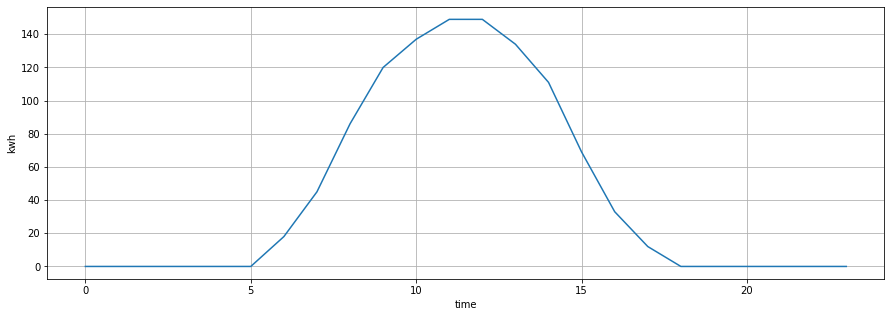

In [11]:
plt.subplots(figsize=(15,5))
plt.plot(data['hour'], data['total_e'])
plt.xlabel('time')
plt.ylabel('kwh')
#plt.xticks(data['hour'], rotation=90)
plt.grid()
plt.show()

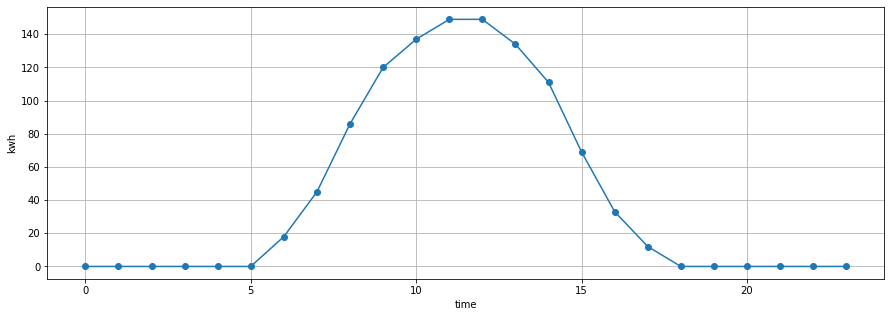

In [15]:
plt.subplots(figsize=(15,5))
plt.plot(data['hour'], data['total_e'], '-o')
plt.xlabel('time')
plt.ylabel('kwh')
#plt.xticks(data['hour'], rotation=90)
plt.grid()
plt.show()

### 這樣並否容易評估發電是否夠好
- 我們一般會把數據uni-form
- 除以整個設置容量: kWh/capacity=kWh/kWp = deg4kw

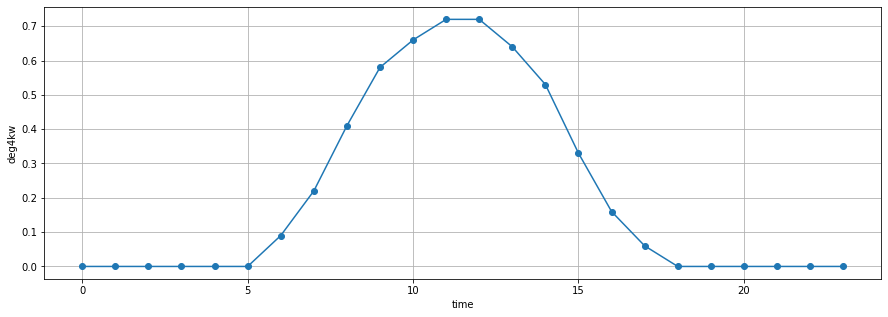

In [17]:
plt.subplots(figsize=(15,5))
plt.plot(data['hour'], data['deg4kw'], '-o')
plt.xlabel('time')
plt.ylabel('deg4kw')
plt.grid()
plt.show()

### 雖然這樣讓我們更清楚發電達到什麼水準了，但有時不太夠!

- 我們來看一下5/7的趨勢圖

In [18]:
import json
ffn = os.path.join(base_path, 'plant02_day_2023-05-07.json')
with open(ffn, 'r') as f:
    data = json.load(f)

data = data['data']

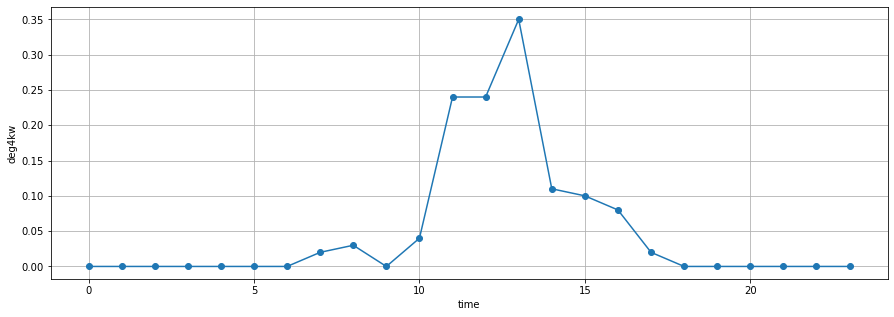

In [19]:
plt.subplots(figsize=(15,5))
plt.plot(data['hour'], data['deg4kw'], '-o')
plt.xlabel('time')
plt.ylabel('deg4kw')
plt.grid()
plt.show()

### 把日照的資訊加進來

In [20]:
for i in range(len(data['sun'])):
    data['sun'][i]/=1000

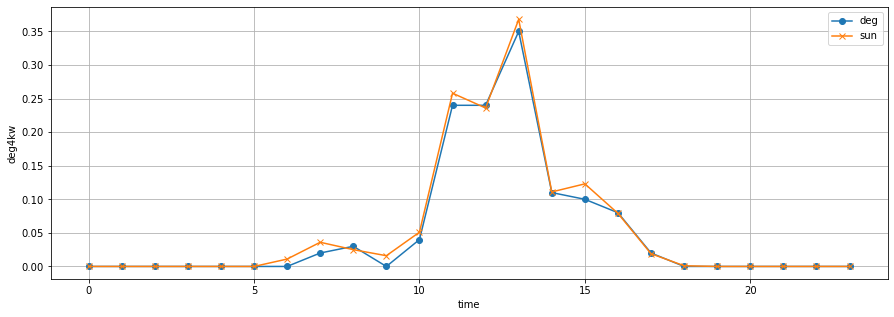

In [22]:
plt.subplots(figsize=(15,5))
plt.plot(data['hour'], data['deg4kw'], '-o', label='deg')
plt.plot(data['hour'], data['sun'], '-x', label='sun')
plt.xlabel('time')
plt.ylabel('deg4kw')
plt.grid()
plt.legend()
plt.show()